In [28]:
# 05_clustering (n)
# 1. Zaimplementuj Kmeans clustering dla datasetu wine.
    # a - zmniejsz wymiar datasetu,  korzystając  StandardScaler oraz PCA(n_components=2, whiten=True) -> tylko do wizualizacji
    # b - narysuj wykres typu "scatter" -> sprawdź czy widać "klastry"
    # c - korzystając z metody "Elbow" wyznacz najlepszą liczbę n_clusters (wykorzystaj for loop, np range(1,11)) ->wykres
    # d - korzystając z metryki silhouette_score, ponownie znajdź najlepszą liczbę n_clusters i porównaj z met. powyżej -> wykres,
    # e - utwórz wykres typu "scatter", nadając każdemu punktowi kolor zgodny z danym klastrem
    # f - wyznacz wartość accuracy, porównując numer klastra z kolumną "target" ('y')
    # g - w algorytmie KMeans zmień init='random' na init='k-means++' i porównaj wyniki accuracy.

# 2. Wyznacz liczbę klastrów korzystając z MeanShift i porównaj z pkt.1

# Rozwiązanie prześlij jako printscreen (jpg, pdf).
# Nazwa pliku (bez polskich znaków):

# Nazwisko_Imie_05_niestacj.jpg

In [29]:
import numpy as np
seed = np.random.seed(61)

In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

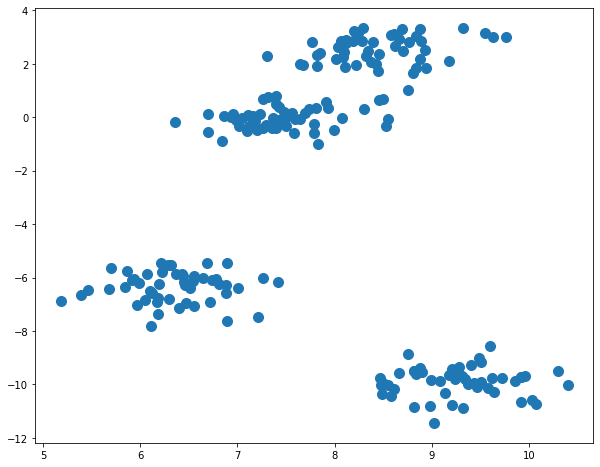

In [31]:
X, y = make_blobs(
    n_samples=200,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=seed
)

plt.figure(figsize=(10, 8))
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=100
)

plt.show()

In [32]:
from sklearn.cluster import KMeans

In [33]:
km_cls = KMeans(
    n_clusters=4,
    init='random',
    n_init=10,
    max_iter=300,
    random_state=seed
)

y_km = km_cls.fit_predict(X)
km_cls.cluster_centers_

array([[ 6.34871868, -6.36106946],
       [ 8.45242742,  2.53678751],
       [ 7.46243575, -0.03135427],
       [ 9.26883948, -9.89932491]])

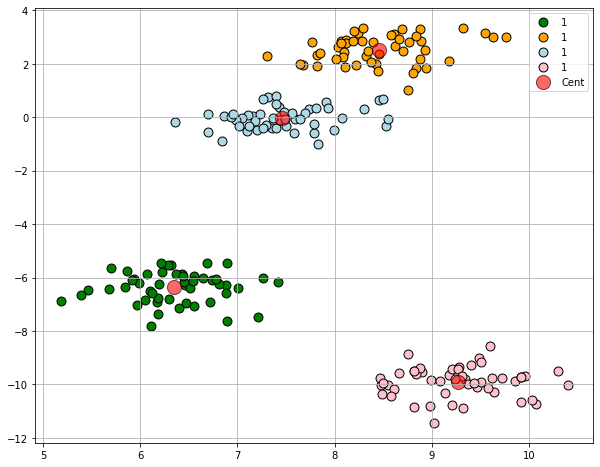

In [34]:
plt.figure(figsize=(10, 8))

plt.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    c='green', edgecolor='black',
    label='1', s=80
)

plt.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    c='orange', edgecolor='black',
    label='1', s=80
)

plt.scatter(
    X[y_km == 2, 0],
    X[y_km == 2, 1],
    c='lightblue', edgecolor='black',
    label='1', s=80
)

plt.scatter(
    X[y_km == 3, 0],
    X[y_km == 3, 1],
    c='pink', edgecolor='black',
    label='1', s=80
)

plt.scatter(
    km_cls.cluster_centers_[:, 0],
    km_cls.cluster_centers_[:, 1],
    c='r', marker="o", s=200, alpha=0.6,
    edgecolor="black", label='Cent'
)

plt.legend()
plt.grid()
plt.show()

# 1

In [35]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [36]:
import numpy as np
seed = np.random.seed(61)

In [37]:
# load and return the diabetes dataset (classification).
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [38]:
# data, target assignments
X, y = wine.data, wine.target

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# a

In [40]:
# standar scaling
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [41]:
# dimensionality reduction 
pca = PCA(n_components=2, whiten=True)
X_reducted = pca.fit_transform(X_train_std)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.36445475 0.18083229]
[25.93806989 18.27064327]


# b

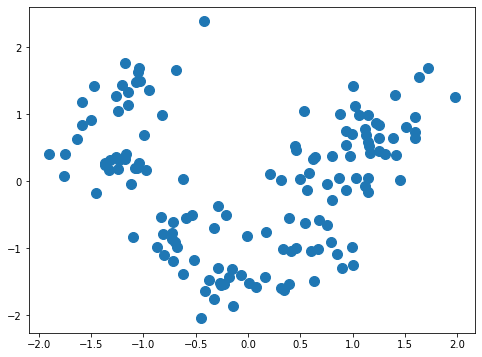

In [42]:
# scatter for claster visibility
plt.figure(figsize=(8, 6))
plt.scatter(
    X_reducted[:, 0],
    X_reducted[:, 1],
    s=100
)

plt.show()

# c

In [43]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

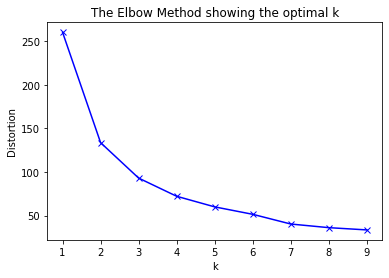

In [44]:
# k means determine k
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# d

For n_clusters = 2 The average silhouette_score is : 0.6568536504294319
For n_clusters = 3 The average silhouette_score is : 0.5711381937868844
For n_clusters = 4 The average silhouette_score is : 0.5620323449580352
For n_clusters = 5 The average silhouette_score is : 0.5489993239795691
For n_clusters = 6 The average silhouette_score is : 0.5656413100386389
For n_clusters = 7 The average silhouette_score is : 0.5621677013863717
For n_clusters = 8 The average silhouette_score is : 0.5406824747857625
For n_clusters = 9 The average silhouette_score is : 0.5279415465513754


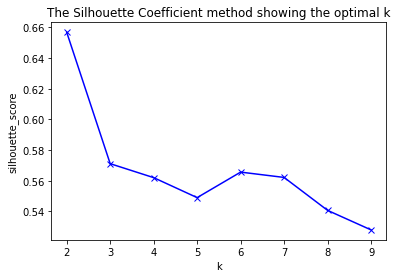

In [45]:
import numpy as np

range_n_clusters = list(range(2, 10))
silhouette_score = []

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=seed)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_score.append(silhouette_avg)
    
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
plt.plot(range_n_clusters, silhouette_score, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('The Silhouette Coefficient method showing the optimal k')
plt.show()

# e

In [46]:
km_cls = KMeans(
    n_clusters=2,
    init='random',
    n_init=10,
    max_iter=300,
    random_state=seed
)

y_km = km_cls.fit_predict(X_reducted)
km_cls.cluster_centers_

array([[ 0.50214212, -0.3059939 ],
       [-1.19557647,  0.7285569 ]])

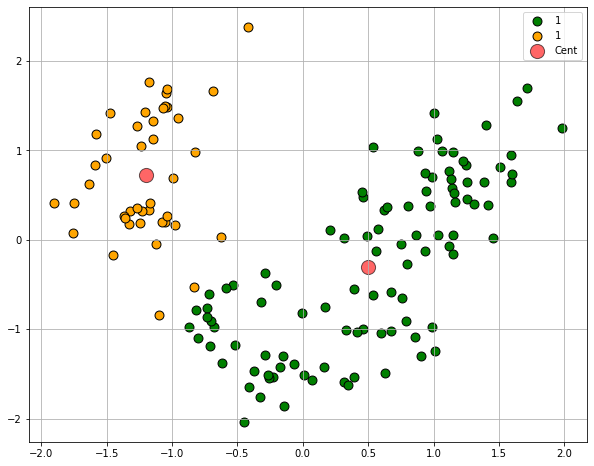

In [47]:
plt.figure(figsize=(10, 8))

plt.scatter(
    X_reducted[y_km == 0, 0],
    X_reducted[y_km == 0, 1],
    c='green', edgecolor='black',
    label='1', s=80
)

plt.scatter(
    X_reducted[y_km == 1, 0],
    X_reducted[y_km == 1, 1],
    c='orange', edgecolor='black',
    label='1', s=80
)

plt.scatter(
    km_cls.cluster_centers_[:, 0],
    km_cls.cluster_centers_[:, 1],
    c='r', marker="o", s=200, alpha=0.6,
    edgecolor="black", label='Cent'
)

plt.legend()
plt.grid()
plt.show()

# f, g

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
init_list = ["random", "k-means++"]

for i in init_list:
    model = KMeans(
        n_clusters=2,
        init=i,
        n_init=10,
        max_iter=300,
        random_state=seed
    ) 
        
    model.fit(X, y)
    pred = model.predict(X)
    print(f"Kmeans with init= {i}. ACC: {accuracy_score(y, pred)}")

Kmeans with init= random. ACC: 0.6573033707865169
Kmeans with init= k-means++. ACC: 0.6573033707865169


# 2

In [50]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [51]:
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

#
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 4


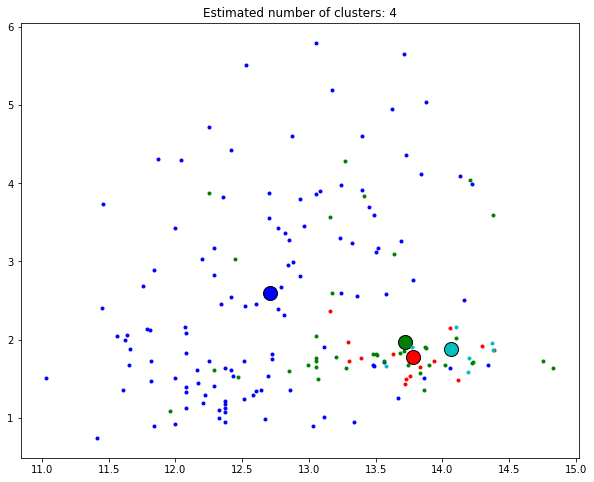

In [52]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(figsize=(10, 8))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()